In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('movies.csv')
df.sample(20)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
4716,Titoudao,(2020),\nDrama,NaN,\nFrom a poor village girl to a famous wayang ...,"\n \n Stars:\nAndie Chen, \nJoel...",NaN,60.0,NaN
4080,Les gars sûrs,(2022),"\nAction, Comedy",NaN,"\nPlot Unknown, Sequel of De l'autre côté du p...",\n Director:\nLouis Leterrier\n| \n Star...,NaN,NaN,NaN
4873,GP506,(2008),\nHorror,5.9,\n(Korean with English subtitles) A squad of K...,\n Director:\nSu-chang Kong\n| \n Stars:...,"1,720",121.0,NaN
1242,Gojira shingyura pointo,(2021– ),"\nAnimation, Action, Adventure",6.6,"\nBrought together by a mysterious song, a gra...",\n \n Stars:\nCristina Valenzuel...,"1,054",24.0,NaN
5587,Sing On! Germany,(2020– ),"\nGame-Show, Music, Reality-TV",5.5,\nIn this karaoke competition hosted by Palina...,"\n \n Stars:\nPalina Rojinski, \...",117,NaN,NaN
7279,Power Rangers Beast Morphers,(2019–2020),"\nAction, Adventure, Drama",7.7,"\nAfter witnessing a boy being bullied, Ravi t...",\n Director:\nRiccardo Pellizzeri\n| \n ...,30,NaN,NaN
6755,Power Rangers Beast Morphers,(2019–2020),"\nAction, Adventure, Drama",8.7,\nScrozzle executes his plan to finally free E...,\n Director:\nRiccardo Pellizzeri\n| \n ...,42,NaN,NaN
8221,Country Comfort,(2021),"\nComedy, Drama, Family",8.4,\nBoone's big ask leads to a big answer. The f...,\n Director:\nLeslie Kolins Small\n| \n ...,73,NaN,NaN
4864,Seth Meyers: Lobby Baby,(2019 TV Special),\nComedy,7.5,\nSNL alumnus and subversive master of late-ni...,\n Director:\nNeal Brennan\n| \n Stars:\...,"2,275",61.0,NaN
7733,La casa de las flores,(2018–2020),"\nComedy, Drama",6.4,\nDiego confronts Lucía about a secret she's b...,\n Director:\nYibran Asuad\n| \n Stars:\...,123,NaN,NaN


In [99]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [100]:
print(df['YEAR'].dtype)
print(df['GENRE'].dtype)
print(df['RATING'].dtype)
print(df['VOTES'].dtype)
print(df['RunTime'].dtype)
print(df['Gross'].dtype)

object
object
float64
object
float64
object


In [101]:
df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [102]:
df['VOTES'] = pd.to_numeric(df['VOTES'],errors='coerce')
df['VOTES']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9994   NaN
9995   NaN
9996   NaN
9997   NaN
9998   NaN
Name: VOTES, Length: 9999, dtype: float64

In [103]:
df['VOTES'].fillna(df['VOTES'].mean(),inplace=True)
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64

In [104]:
df.duplicated().sum()

431

In [105]:
df.drop_duplicates(inplace=True)


{'whiskers': [<matplotlib.lines.Line2D at 0x225ef331190>,
 'caps': [<matplotlib.lines.Line2D at 0x225ef332ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225ef34b050>],
 'medians': [<matplotlib.lines.Line2D at 0x225ef37c6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225ef36f2d0>],
 'means': []}

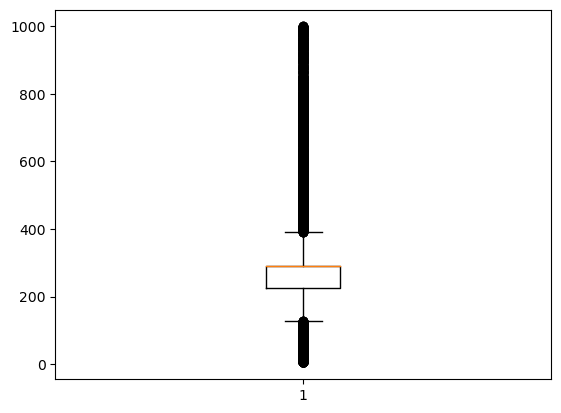

In [106]:
plt.boxplot(df['VOTES'])

{'whiskers': [<matplotlib.lines.Line2D at 0x225f04db0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x225f04daf90>,
 'boxes': [<matplotlib.lines.Line2D at 0x225f04e08d0>],
 'medians': [<matplotlib.lines.Line2D at 0x225f04d99d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225f04d8f10>],
 'means': []}

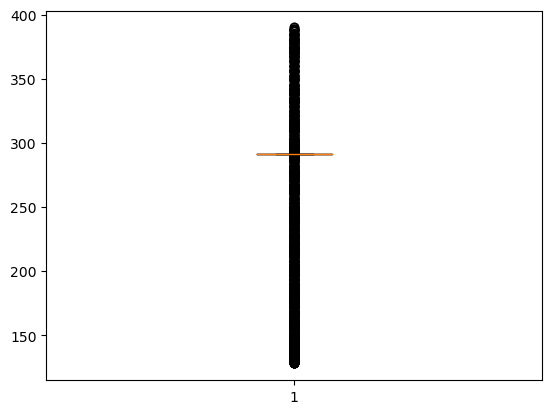

In [107]:
def remove_outliers(df,column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_df = df[(df[column_name]>=lower_bound) & (df[column_name]<=upper_bound)]
    return filtered_df
# print(df)
df = remove_outliers(df,'VOTES')
plt.boxplot(df['VOTES'])
    

In [108]:
df['VOTES']

0       291.47189
1       291.47189
2       291.47189
3       291.47189
4       291.47189
          ...    
9993    291.47189
9995    291.47189
9996    291.47189
9997    291.47189
9998    291.47189
Name: VOTES, Length: 6553, dtype: float64

In [109]:
df['RunTime'].dropna()

0       121.0
1        25.0
2        44.0
3        23.0
5        50.0
        ...  
9953      7.0
9954     13.0
9955     18.0
9956     50.0
9976     38.0
Name: RunTime, Length: 4978, dtype: float64

In [124]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [125]:
df['RunTime'].fillna(df['RunTime'].mean(),inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x225f1bf1ed0>,
 'caps': [<matplotlib.lines.Line2D at 0x225f1bf32d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225f1bf1710>],
 'medians': [<matplotlib.lines.Line2D at 0x225f1bfc510>],
 'fliers': [<matplotlib.lines.Line2D at 0x225f1bc5090>],
 'means': []}

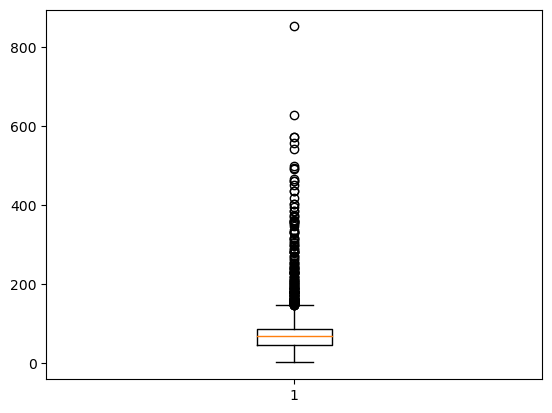

In [127]:
plt.boxplot(df['RunTime'])

{'whiskers': [<matplotlib.lines.Line2D at 0x225f1c5fed0>,
 'caps': [<matplotlib.lines.Line2D at 0x225f1c65110>,
 'boxes': [<matplotlib.lines.Line2D at 0x225f1c5f350>],
 'medians': [<matplotlib.lines.Line2D at 0x225f1c666d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x225f1c67090>],
 'means': []}

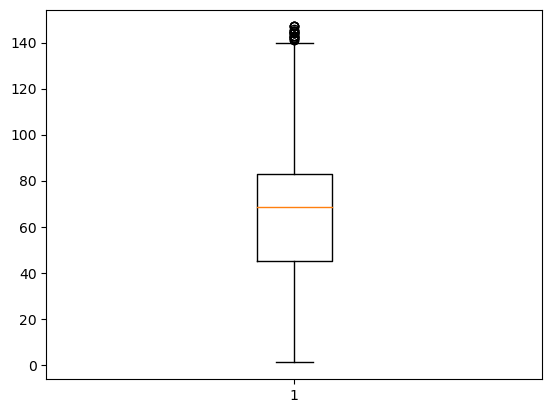

In [129]:
def remove_outliers(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    L =  Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    filtered_df = df[(df[col]>=L)&(df[col]<=U)]
    return filtered_df
df = remove_outliers(df,'RunTime')
plt.boxplot(df['RunTime'])

In [130]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1818
ONE-LINE       0
STARS          0
VOTES       1818
RunTime        0
Gross       9372
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x225f46f1f50>,
 'caps': [<matplotlib.lines.Line2D at 0x225f46f32d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x225f46f1550>],
 'medians': [<matplotlib.lines.Line2D at 0x225f4700350>],
 'fliers': [<matplotlib.lines.Line2D at 0x225f4700b90>],
 'means': []}

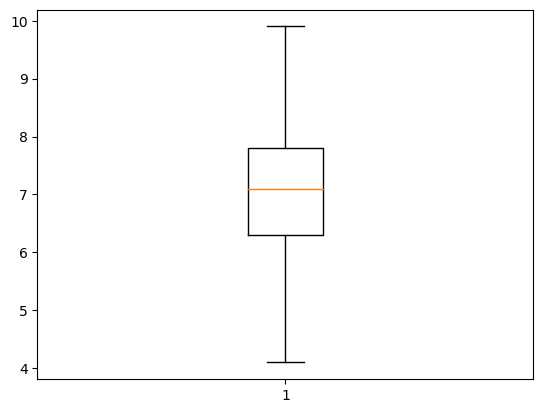

In [137]:
df['RATING'].fillna(df['RATING'].mean(),inplace=True)
df = remove_outliers(df,'RATING')
plt.boxplot(df['RATING'])

In [141]:
from sklearn.preprocessing import LabelEncoder
data = ['cat','dog','fish','dog','cat']
encoded_labels = LabelEncoder().fit_transform(data)
print(encoded_labels)

[0 1 2 1 0]


# LINEAR REGRESSION

In [138]:
import pandas as pd
from sklearn.model_selection import train_test_split

salary_data = pd.read_csv('Salary_Data.csv')
salary_data.sample(10)

,YearsExperience,Salary
11,4.0,55794.0
0,1.1,39343.0
10,3.9,63218.0
2,1.5,37731.0
20,6.8,91738.0
26,9.5,116969.0
13,4.1,57081.0
15,4.9,67938.0
3,2.0,43525.0
16,5.1,66029.0


In [159]:
X = salary_data.drop(columns='Salary')
y = salary_data['Salary']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=2)

In [157]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [158]:
regressor.fit(X_train,y_train)

LinearRegression()

In [161]:
pred = regressor.predict(X_test)
print(pred)

[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


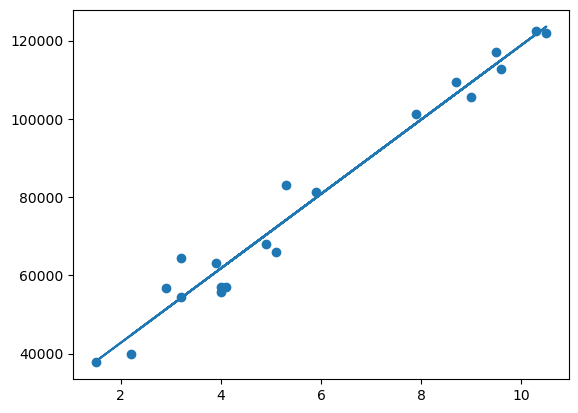

In [162]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))
plt.show()

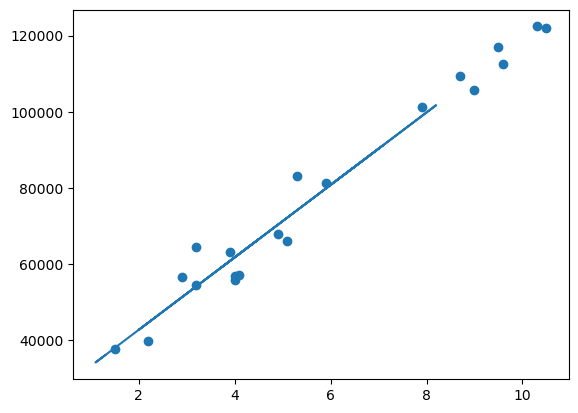

In [163]:
plt.scatter(X_train,y_train)
plt.plot(X_test,regressor.predict(X_test))
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,roc_auc_score

In [170]:
import numpy as np
mse = mean_squared_error(y_test,pred)
print(mse)

60451409.832681164


In [172]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
print(rmse)

7775.050471391241


In [174]:
from sklearn.linear_model import Lasso
a = Lasso()
a.fit(X_train,y_train)
y_pred = a.predict(X_test)

In [175]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

60450432.07056749


In [176]:
from sklearn.linear_model import Ridge
b = Ridge()
b.fit(X_train,y_train)
y_pred = b.predict(X_test)

In [177]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

60016163.454826


In [181]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

In [182]:
df = pd.read_csv('movies.csv')
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [183]:
df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [184]:
df.duplicated().sum()

431

In [185]:
df.dropna(inplace=True)

In [186]:
df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
77,The Hitman's Bodyguard,(2017),"\nAction, Comedy, Crime",6.9,"\nThe world's top bodyguard gets a new client,...",\n Director:\nPatrick Hughes\n| \n Stars...,"205,979",118.0,$75.47M
85,Jurassic Park,(1993),"\nAction, Adventure, Sci-Fi",8.1,\nA pragmatic paleontologist visiting an almos...,\n Director:\nSteven Spielberg\n| \n Sta...,"897,444",127.0,$402.45M
95,Don't Breathe,(2016),"\nCrime, Horror, Thriller",7.1,"\nHoping to walk away with a massive fortune, ...",\n Director:\nFede Alvarez\n| \n Stars:\...,"237,601",88.0,$89.22M
111,The Lord of the Rings: The Fellowship of the Ring,(2001),"\nAction, Adventure, Drama",8.8,\nA meek Hobbit from the Shire and eight compa...,\n Director:\nPeter Jackson\n| \n Stars:...,"1,713,028",178.0,$315.54M
125,Escape Room,(I) (2019),"\nAction, Adventure, Horror",6.4,\nSix strangers find themselves in a maze of d...,\n Director:\nAdam Robitel\n| \n Stars:\...,"99,351",99.0,$57.01M


In [187]:
feature = df.drop(columns='RATING')
target = df['RATING']

In [188]:
X_train,X_test,y_train,y_test = train_test_split(feature,target,random_state=2,test_size = 0.2)

In [189]:
from sklearn.tree import DecisionTreeClassifier
a = DecisionTreeClassifier(criterion='entropy')
a.fit(X_train,y_train)

ValueError: could not convert string to float: 'Howl'

In [190]:
pred = a.predict(X_test)

ValueError: could not convert string to float: 'Jurassic Park III'

In [ ]:
from sklearn import tree
tree.plot_tree(a.fit(X_train,y_train))
accuracy_score(pred,y_test)

from sklearn.metrics import confusion_matrix,classification_report
matrix = confusion_matrix(y_test,pred)

report = classification_report(y_test,pred)
